In [1]:
# Get pandas and postgres to work together
import psycopg2 as pg
import pandas.io.sql as pd_sql

import numpy as np 
import pandas as pd 
import datetime
import numpy as np

# We are also going to do some basic viz
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.style.use('ggplot')

In [2]:
# There is a bug in matplotlib. You cannot set the rc parameters in the same
# cell that you use the "%matplotlib inline" magic command
plt.style.use('ggplot')
plt.rc('font', size=18)

In [3]:
# Postgres info to connect

connection_args = {
    'host': 'localhost',  # We are connecting to our _local_ version of psql
    'dbname': 'traffic',    # DB that we are connecting to
    'port': 5432          # port we opened on AWS
}

# We will talk about this magic Python trick!
connection = pg.connect(dbname='traffic', user='postgres', password='3232628')

### We can query PostgreSQL to create a table in this environment

In [4]:
# We query our accident table. We bring the columns we want to work with.
query = "SELECT st_case , fatals, drunk_dr , persons, county, city, state, harm_ev, man_coll , weather, ve_total, day, month,year,day_week,hour,minute   FROM accident ;"

# creating variable
accident = pd_sql.read_sql(query, connection)

In [5]:
accident.head()

,st_case,fatals,drunk_dr,persons,county,city,state,harm_ev,man_coll,weather,ve_total,day,month,year,day_week,hour,minute
0,10001.0,1.0,1.0,1.0,127.0,0.0,1.0,35.0,0.0,1.0,1.0,1.0,1.0,2015.0,5.0,2.0,40.0
1,10002.0,1.0,0.0,1.0,83.0,0.0,1.0,34.0,0.0,10.0,1.0,1.0,1.0,2015.0,5.0,22.0,13.0
2,10003.0,1.0,1.0,2.0,11.0,0.0,1.0,42.0,0.0,1.0,1.0,1.0,1.0,2015.0,5.0,1.0,25.0
3,10004.0,1.0,1.0,1.0,45.0,0.0,1.0,53.0,0.0,10.0,1.0,4.0,1.0,2015.0,1.0,0.0,57.0
4,10005.0,1.0,0.0,2.0,45.0,2050.0,1.0,12.0,6.0,1.0,2.0,7.0,1.0,2015.0,4.0,7.0,9.0


In [6]:
query = "SELECT st_case, doa , sex, drinking, race, age, air_bag, drugs, location FROM person;"

person = pd_sql.read_sql(query, connection)

In [7]:
person.head()

,st_case,doa,sex,drinking,race,age,air_bag,drugs,location
0,10001.0,7.0,1.0,9.0,1.0,68.0,1.0,9.0,0.0
1,10002.0,7.0,1.0,0.0,1.0,49.0,20.0,0.0,0.0
2,10003.0,7.0,1.0,1.0,2.0,31.0,1.0,9.0,0.0
3,10003.0,0.0,2.0,8.0,0.0,20.0,1.0,8.0,0.0
4,10004.0,7.0,1.0,1.0,1.0,40.0,20.0,9.0,0.0


In [8]:
person = person.drop(person.columns[3] , axis=1)

In [9]:
# doa : Total number of dies at scene
doa = person.groupby(['st_case'])[['doa']].sum()
doa

,doa
st_case,
10001.0,7.0
10002.0,7.0
10003.0,7.0
10004.0,7.0
10005.0,7.0
...,...
560126.0,14.0
560127.0,7.0
560128.0,7.0


In [10]:
age = person.groupby(['st_case'])[['age']].mean()
age

,age
st_case,
10001.0,68.000000
10002.0,49.000000
10003.0,25.500000
10004.0,40.000000
10005.0,42.000000
...,...
560126.0,43.000000
560127.0,28.333333
560128.0,38.000000


In [11]:
personm = pd.merge(doa , age , on='st_case')
personm

,doa,age
st_case,,
10001.0,7.0,68.000000
10002.0,7.0,49.000000
10003.0,7.0,25.500000
10004.0,7.0,40.000000
10005.0,7.0,42.000000
...,...,...
560126.0,14.0,43.000000
560127.0,7.0,28.333333
560128.0,7.0,38.000000


In [12]:
df = pd.merge(accident , personm , on='st_case')

In [13]:
df.shape

(32166, 19)

In [14]:
# we combine two dataframes according to 'st_case'
df.head()

,st_case,fatals,drunk_dr,persons,county,city,state,harm_ev,man_coll,weather,ve_total,day,month,year,day_week,hour,minute,doa,age
0,10001.0,1.0,1.0,1.0,127.0,0.0,1.0,35.0,0.0,1.0,1.0,1.0,1.0,2015.0,5.0,2.0,40.0,7.0,68.0
1,10002.0,1.0,0.0,1.0,83.0,0.0,1.0,34.0,0.0,10.0,1.0,1.0,1.0,2015.0,5.0,22.0,13.0,7.0,49.0
2,10003.0,1.0,1.0,2.0,11.0,0.0,1.0,42.0,0.0,1.0,1.0,1.0,1.0,2015.0,5.0,1.0,25.0,7.0,25.5
3,10004.0,1.0,1.0,1.0,45.0,0.0,1.0,53.0,0.0,10.0,1.0,4.0,1.0,2015.0,1.0,0.0,57.0,7.0,40.0
4,10005.0,1.0,0.0,2.0,45.0,2050.0,1.0,12.0,6.0,1.0,2.0,7.0,1.0,2015.0,4.0,7.0,9.0,7.0,42.0


#### We continue to get the features we want to work with from other tables.

In [15]:
query = "SELECT st_case, mdrdstrd FROM distract;"

distract = pd_sql.read_sql(query, connection)

In [16]:
mdrd = distract.groupby(['st_case'])[['mdrdstrd']].max()

In [17]:
mdrd.head()

,mdrdstrd
st_case,
10001.0,99.0
10002.0,0.0
10003.0,0.0
10004.0,99.0
10005.0,99.0


In [18]:
query = "SELECT st_case, soe FROM cevent;"

cevent = pd_sql.read_sql(query, connection)

In [19]:
query = "SELECT st_case, mvisobsc FROM vision;"

vision = pd_sql.read_sql(query, connection)

In [20]:
vision.head()

,st_case,mvisobsc
0,10001.0,0.0
1,10002.0,0.0
2,10003.0,0.0
3,10004.0,0.0
4,10005.0,2.0


In [21]:
query = "SELECT st_case, mdrmanav FROM maneuver;"

maneuver = pd_sql.read_sql(query, connection)

In [22]:
mane = maneuver.groupby(['st_case'])[['mdrmanav']].max()

In [23]:
query = "SELECT st_case, mod_year FROM vehicle;"

vehicle = pd_sql.read_sql(query, connection)

In [24]:
vehicle.head()

,st_case,mod_year
0,10001.0,2003.0
1,10002.0,2006.0
2,10003.0,2008.0
3,10004.0,2005.0
4,10005.0,2006.0


In [25]:
veh = vehicle.groupby(['st_case'])[['mod_year']].mean().round()

In [26]:
veh.head()

,mod_year
st_case,
10001.0,2003.0
10002.0,2006.0
10003.0,2008.0
10004.0,2005.0
10005.0,2010.0


In [27]:
df = pd.merge(df , veh , on='st_case')

In [28]:
df = pd.merge(df , mane , on='st_case')

In [29]:
df = pd.merge(df , mdrd , on='st_case')

In [30]:
df.head()

,st_case,fatals,drunk_dr,persons,county,city,state,harm_ev,man_coll,weather,...,month,year,day_week,hour,minute,doa,age,mod_year,mdrmanav,mdrdstrd
0,10001.0,1.0,1.0,1.0,127.0,0.0,1.0,35.0,0.0,1.0,...,1.0,2015.0,5.0,2.0,40.0,7.0,68.0,2003.0,98.0,99.0
1,10002.0,1.0,0.0,1.0,83.0,0.0,1.0,34.0,0.0,10.0,...,1.0,2015.0,5.0,22.0,13.0,7.0,49.0,2006.0,0.0,0.0
2,10003.0,1.0,1.0,2.0,11.0,0.0,1.0,42.0,0.0,1.0,...,1.0,2015.0,5.0,1.0,25.0,7.0,25.5,2008.0,0.0,0.0
3,10004.0,1.0,1.0,1.0,45.0,0.0,1.0,53.0,0.0,10.0,...,1.0,2015.0,1.0,0.0,57.0,7.0,40.0,2005.0,0.0,99.0
4,10005.0,1.0,0.0,2.0,45.0,2050.0,1.0,12.0,6.0,1.0,...,1.0,2015.0,4.0,7.0,9.0,7.0,42.0,2010.0,4.0,99.0


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32166 entries, 0 to 32165
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   st_case   32166 non-null  float64
 1   fatals    32166 non-null  float64
 2   drunk_dr  32166 non-null  float64
 3   persons   32166 non-null  float64
 4   county    32166 non-null  float64
 5   city      32166 non-null  float64
 6   state     32166 non-null  float64
 7   harm_ev   32166 non-null  float64
 8   man_coll  32166 non-null  float64
 9   weather   32166 non-null  float64
 10  ve_total  32166 non-null  float64
 11  day       32166 non-null  float64
 12  month     32166 non-null  float64
 13  year      32166 non-null  float64
 14  day_week  32166 non-null  float64
 15  hour      32166 non-null  float64
 16  minute    32166 non-null  float64
 17  doa       32166 non-null  float64
 18  age       32166 non-null  float64
 19  mod_year  32166 non-null  float64
 20  mdrmanav  32166 non-null  fl

In [32]:
df.isnull().sum()

st_case     0
fatals      0
drunk_dr    0
persons     0
county      0
city        0
state       0
harm_ev     0
man_coll    0
weather     0
ve_total    0
day         0
month       0
year        0
day_week    0
hour        0
minute      0
doa         0
age         0
mod_year    0
mdrmanav    0
mdrdstrd    0
dtype: int64

In [33]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
st_case,32166.0,276729.623733,162486.332746,10001.0,122183.250000,280002.5,420565.75,560130.0
fatals,32166.0,1.090966,0.365794,1.0,1.000000,1.0,1.00,10.0
drunk_dr,32166.0,0.283187,0.467420,0.0,0.000000,0.0,1.00,3.0
persons,32166.0,2.290493,1.945197,0.0,1.000000,2.0,3.00,93.0
county,32166.0,91.225051,94.670319,1.0,31.000000,71.0,115.00,999.0
city,32166.0,1197.810918,1889.385749,0.0,0.000000,0.0,1950.00,9999.0
state,32166.0,27.604769,16.255169,1.0,12.000000,28.0,42.00,56.0
harm_ev,32166.0,18.118635,14.112285,1.0,8.000000,12.0,30.00,99.0
man_coll,32166.0,1.832463,5.527316,0.0,0.000000,0.0,2.00,99.0
weather,32166.0,3.808711,10.581454,1.0,1.000000,1.0,2.00,99.0


In [34]:
df["state"].unique()

array([ 1.,  2.,  4.,  5.,  6.,  8.,  9., 10., 11., 12., 13., 15., 16.,
       17., 18., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28., 29.,
       30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42.,
       44., 45., 46., 47., 48., 49., 50., 51., 53., 54., 55., 56.])

In [35]:
states = {1: 'Alabama', 2: 'Alaska', 4: 'Arizona', 5: 'Arkansas', 
          6: 'California', 8: 'Colorado', 9: 'Connecticut', 10: 'Delaware', 
          11: 'District of Columbia', 12: 'Florida', 13: 'Georgia', 15: 'Hawaii', 
          16: 'Idaho', 17: 'Illinois', 18: 'Indiana', 19: 'Iowa', 20: 'Kansas', 
          21: 'Kentucky', 22: 'Louisiana', 23: 'Maine', 24: 'Maryland', 
          25: 'Massachusetts', 26: 'Michigan', 27: 'Minnesota', 
          28: 'Mississippi', 29: 'Missouri', 30: 'Montana', 31: 'Nebraska', 
          32: 'Nevada', 33: 'New Hampshire', 34: 'New Jersey', 35: 'New Mexico', 
          36: 'New York', 37: 'North Carolina', 38: 'North Dakota', 39: 'Ohio', 
          40: 'Oklahoma', 41: 'Oregon', 42: 'Pennsylvania', 43: 'Puerto Rico', 
          44: 'Rhode Island', 45: 'South Carolina', 46: 'South Dakota', 47: 'Tennessee', 
          48: 'Texas', 49: 'Utah', 50: 'Vermont', 51: 'Virginia', 52: 'Virgin Islands', 
          53: 'Washington', 54: 'West Virginia', 55: 'Wisconsin', 56: 'Wyoming'}

df['state']=df['state'].apply(lambda x: states[x])

In [36]:
df['state'].sample(5)

12101            Iowa
8676          Georgia
4139       California
23679    Pennsylvania
11458         Indiana
Name: state, dtype: object

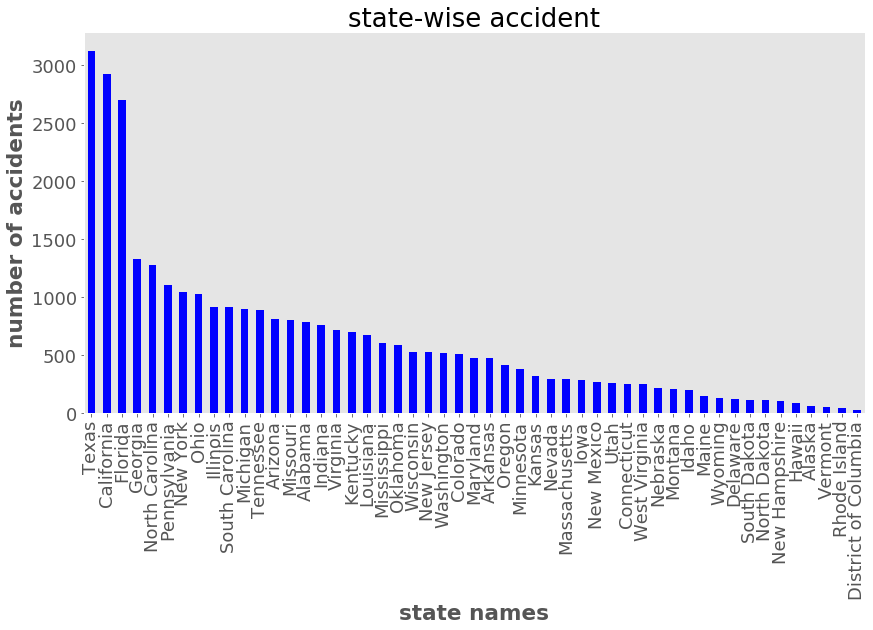

In [37]:
plt.xlabel("state names", weight= "bold")
plt.ylabel("number of accidents",weight= "bold")
df['state'].value_counts().plot(kind='bar', title = 'state-wise accident', figsize = (14,7), grid = False, color ="b");

In [38]:
df_drinking=pd.concat([df['state'],df['drunk_dr']],axis=1)
df_drinking.head()

,state,drunk_dr
0,Alabama,1.0
1,Alabama,0.0
2,Alabama,1.0
3,Alabama,1.0
4,Alabama,0.0


In [39]:
drk_state=df_drinking.groupby('state')
drk_state.sum().head()

,drunk_dr
state,
Alabama,220.0
Alaska,24.0
Arizona,240.0
Arkansas,128.0
California,750.0


Text(0, 0.5, 'number of drunk driving')

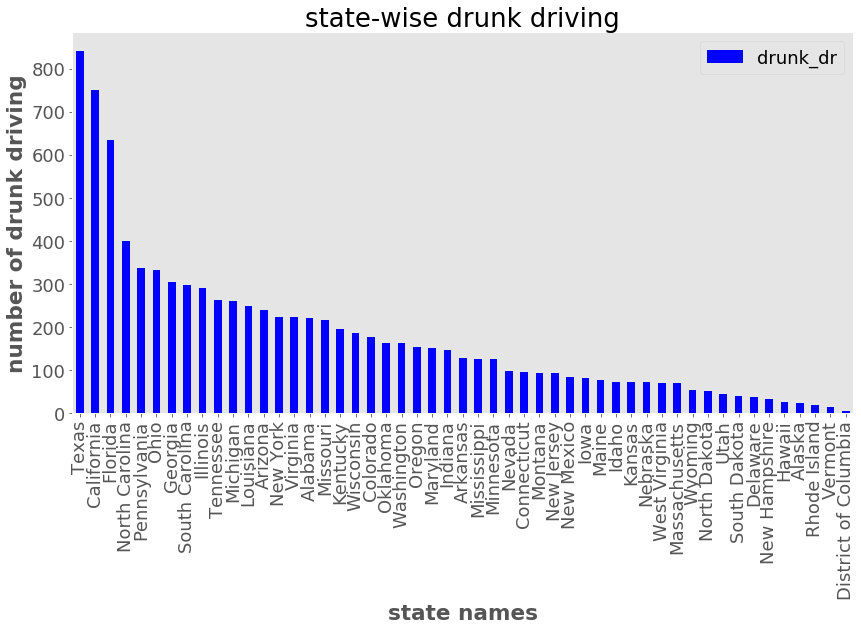

In [40]:
drk_state.sum().sort_values(by=['drunk_dr'],ascending=False).plot(kind='bar', 
                                                                  figsize = (14,7), 
                                                                  grid = False, 
                                                                  title = 'state-wise drunk driving', 
                                                                  color ="b");


plt.xlabel("state names", weight= "bold")
plt.ylabel("number of drunk driving", weight= "bold")

In [41]:
df["day"].unique()

array([ 1.,  4.,  7.,  8.,  3., 13.,  5.,  9., 10., 11., 14., 16., 19.,
       15., 23., 26., 12.,  2., 17., 24., 25., 28., 27., 29., 20., 31.,
       22.,  6., 18., 21., 30.])

In [42]:
df["day_week"].unique()

array([5., 1., 4., 7., 3., 2., 6.])

Text(0, 0.5, 'number of accident')

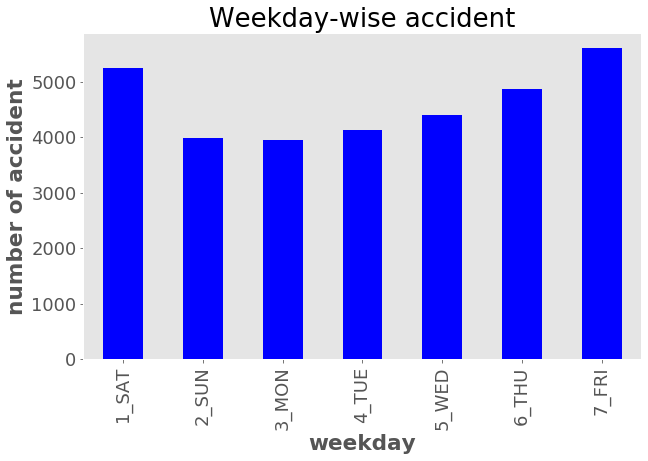

In [43]:
day = {1: '1_SAT', 2: '2_SUN', 3: '3_MON', 4: '4_TUE', 
          5: '5_WED', 6: '6_THU', 7: '7_FRI'}
df['day_week_name']=df['day_week'].apply(lambda x: day[x])
df['day_week_name'].value_counts().sort_index().plot(kind='bar',
                                                     figsize = (10,6),
                                                     title='Weekday-wise accident', 
                                                     grid = False, color ="b");

plt.xlabel("weekday", weight= "bold")
plt.ylabel("number of accident", weight= "bold")

In [44]:
df["hour"].unique()

array([ 2., 22.,  1.,  0.,  7.,  9., 18., 21.,  8., 20.,  6., 10., 17.,
       14., 19., 13.,  3.,  5., 16., 15.,  4., 11., 23., 12., 99.])

In [45]:
df=df[df.hour != 99]

Text(0, 0.5, 'number of accident')

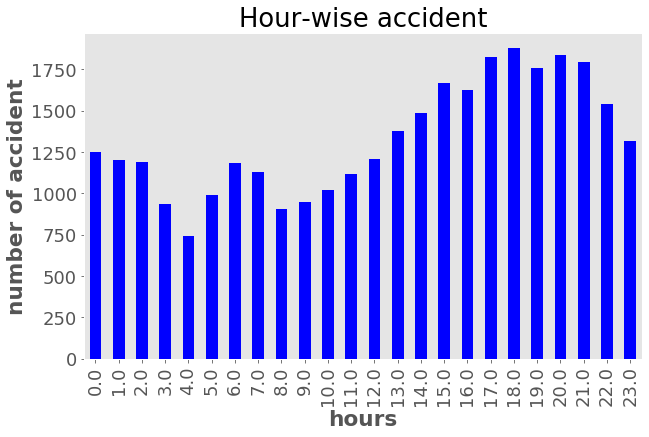

In [46]:
df['hour'].value_counts().sort_index().plot(kind='bar',title='Hour-wise accident',
                                            grid =False,
                                            color = "b", figsize =(10,6));

plt.xlabel("hours", weight= "bold")
plt.ylabel("number of accident", weight= "bold")

In [47]:
df.groupby(['state']).agg({'fatals':sum})

,fatals
state,
Alabama,847.0
Alaska,62.0
Arizona,873.0
Arkansas,531.0
California,3119.0
Colorado,546.0
Connecticut,266.0
Delaware,126.0
District of Columbia,23.0


In [48]:
df['weather'].unique()

array([ 1., 10.,  2.,  5.,  3.,  4., 99., 12., 98.,  6.,  8.,  7., 11.])

In [49]:
weather = {1:'clear',10:'couldy',2:'rain',5:'fog',4:'snow',99:'unknown',3:'sleet',98:'unreported',8:'other',12:'drizzle',11:'blowingSnow',6:'crosswinds',7:'blowingSand'}
df['weather']=df['weather'].apply(lambda x: weather[x] )

Text(0, 0.5, 'number of accident')

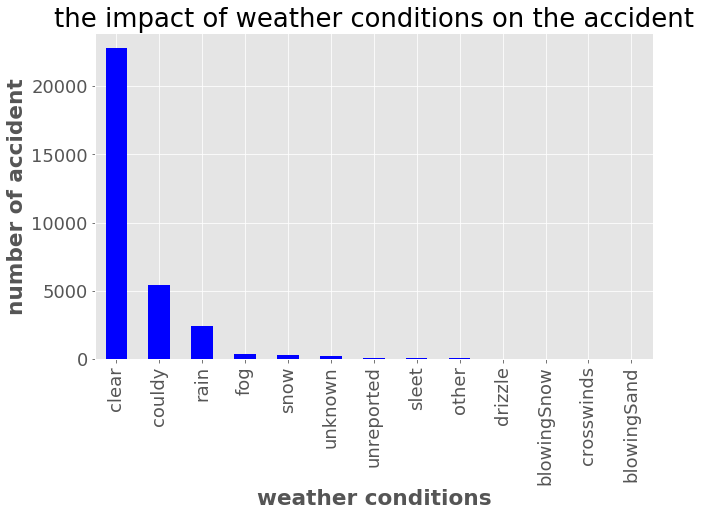

In [50]:
df['weather'].value_counts().plot.bar(title = "the impact of weather conditions on the accident",color ="b",figsize=(10,6));

plt.xlabel("weather conditions", weight = "bold")
plt.ylabel("number of accident", weight = "bold")

### Feature Engineering

In [51]:
df.head()

,st_case,fatals,drunk_dr,persons,county,city,state,harm_ev,man_coll,weather,...,year,day_week,hour,minute,doa,age,mod_year,mdrmanav,mdrdstrd,day_week_name
0,10001.0,1.0,1.0,1.0,127.0,0.0,Alabama,35.0,0.0,clear,...,2015.0,5.0,2.0,40.0,7.0,68.0,2003.0,98.0,99.0,5_WED
1,10002.0,1.0,0.0,1.0,83.0,0.0,Alabama,34.0,0.0,couldy,...,2015.0,5.0,22.0,13.0,7.0,49.0,2006.0,0.0,0.0,5_WED
2,10003.0,1.0,1.0,2.0,11.0,0.0,Alabama,42.0,0.0,clear,...,2015.0,5.0,1.0,25.0,7.0,25.5,2008.0,0.0,0.0,5_WED
3,10004.0,1.0,1.0,1.0,45.0,0.0,Alabama,53.0,0.0,couldy,...,2015.0,1.0,0.0,57.0,7.0,40.0,2005.0,0.0,99.0,1_SAT
4,10005.0,1.0,0.0,2.0,45.0,2050.0,Alabama,12.0,6.0,clear,...,2015.0,4.0,7.0,9.0,7.0,42.0,2010.0,4.0,99.0,4_TUE


In [52]:
df.columns

Index(['st_case', 'fatals', 'drunk_dr', 'persons', 'county', 'city', 'state',
       'harm_ev', 'man_coll', 'weather', 've_total', 'day', 'month', 'year',
       'day_week', 'hour', 'minute', 'doa', 'age', 'mod_year', 'mdrmanav',
       'mdrdstrd', 'day_week_name'],
      dtype='object')

In [53]:
df.shape

(31917, 23)

In [54]:
df[df['drunk_dr'] > 1 ]['drunk_dr'].value_counts()

2.0    243
3.0      2
Name: drunk_dr, dtype: int64

In [55]:
df['drunk_dr'] = df['drunk_dr'].replace(2 , 1)

In [56]:
df['drunk_dr'] = df['drunk_dr'].replace(3 , 1)

In [57]:
df.drunk_dr = df.drunk_dr.astype(object)
df.county = df.county.astype(object)
df.city = df.city.astype(object)
df.state = df.state.astype(object)
df.harm_ev = df.harm_ev.astype(object)
df.man_coll = df.man_coll.astype(object)
df.weather=df.weather.astype(object)
df.mdrmanav=df.mdrmanav.astype(object)
df.mdrdstrd=df.mdrdstrd.astype(object)

In [58]:
distract = {0: 'Not Distracted', 1: 'Looked But Did Not See',
           3: 'By Other Occupant(s)', 4: 'By a Moving Object in Vehicle',
           5: 'While Talking or Listening to Cellular Phone',
           6: 'While Manipulating Cellular Phone',
           7: 'While Adjusting Audio or Climate Controls',
           9: 'While Using Other Component/Controls Integral to Vehicle',
           10: 'While Using or Reaching For Device/Object Brought Into Vehicle',
           12: 'Distracted by Outside Person, Object or Event',
           13: 'Eating or Drinking',
           14: 'Smoking Related',
           15: 'Other Cellular Phone Related',
           16: 'No Driver Present/Unknown if Driver Present',
           17: 'Distraction/Inattention',
           18: 'Distraction/Careless',
           19: 'Careless/Inattentive',
           92: 'Distraction (Distracted), Details Unknown',
           93: 'Inattention (Inattentive), Details Unknown',
           96: 'Not Reported',
           97: 'Lost In Thought/Day Dreaming',
           98: 'Other Distraction',
           99: 'Unknown if Distracted'}

df['mdrdstrd'] = df['mdrdstrd'].apply(lambda x: distract[x])

In [59]:
df['mdrmanav'].unique()

array([98.0, 0.0, 4.0, 99.0, 5.0, 92.0, 3.0, 95.0, 1.0, 2.0], dtype=object)

In [60]:
mdrmanav = {0: 'Driver Did Not Maneuver To Avoid',
1: 'Object',
2: 'Poor Road Conditions',
3: 'Live Animal',
4: 'Motor Vehicle',
5: 'Pedestrian, Pedalcyclist or Other Non-Motorist',
92: 'Phantom/Non-Contact Motor Vehicle',
95: 'No Driver Present/Unknown if Driver Present',
98: 'Not Reported',
99: 'Unknown'}

df['mdrmanav'] = df['mdrmanav'].apply(lambda x: mdrmanav[x])

In [61]:
df.columns

Index(['st_case', 'fatals', 'drunk_dr', 'persons', 'county', 'city', 'state',
       'harm_ev', 'man_coll', 'weather', 've_total', 'day', 'month', 'year',
       'day_week', 'hour', 'minute', 'doa', 'age', 'mod_year', 'mdrmanav',
       'mdrdstrd', 'day_week_name'],
      dtype='object')

In [62]:
def f(x):
    year = x[0]
    month = x[1]
    day = x[2]
    hour = x[3]
    minute = x[4]

    if hour == 99:
        hour = 0
    if minute == 99:
        minute = 0
    s = "%02d-%02d-%02d %02d:%02d:00" % (year,month,day,hour,minute)
    c = datetime.datetime.strptime(s,'%Y-%m-%d %H:%M:%S')
    return c
 
df['crashTime']   = df[['year','month','day','hour','minute']].apply(f, axis=1)

In [63]:
df.head()

,st_case,fatals,drunk_dr,persons,county,city,state,harm_ev,man_coll,weather,...,day_week,hour,minute,doa,age,mod_year,mdrmanav,mdrdstrd,day_week_name,crashTime
0,10001.0,1.0,1,1.0,127,0,Alabama,35,0,clear,...,5.0,2.0,40.0,7.0,68.0,2003.0,Not Reported,Unknown if Distracted,5_WED,2015-01-01 02:40:00
1,10002.0,1.0,0,1.0,83,0,Alabama,34,0,couldy,...,5.0,22.0,13.0,7.0,49.0,2006.0,Driver Did Not Maneuver To Avoid,Not Distracted,5_WED,2015-01-01 22:13:00
2,10003.0,1.0,1,2.0,11,0,Alabama,42,0,clear,...,5.0,1.0,25.0,7.0,25.5,2008.0,Driver Did Not Maneuver To Avoid,Not Distracted,5_WED,2015-01-01 01:25:00
3,10004.0,1.0,1,1.0,45,0,Alabama,53,0,couldy,...,1.0,0.0,57.0,7.0,40.0,2005.0,Driver Did Not Maneuver To Avoid,Unknown if Distracted,1_SAT,2015-01-04 00:57:00
4,10005.0,1.0,0,2.0,45,2050,Alabama,12,6,clear,...,4.0,7.0,9.0,7.0,42.0,2010.0,Motor Vehicle,Unknown if Distracted,4_TUE,2015-01-07 07:09:00


In [64]:
df = df.drop(columns=['harm_ev','county','city', 'man_coll' ])

In [65]:
df.head()

,st_case,fatals,drunk_dr,persons,state,weather,ve_total,day,month,year,day_week,hour,minute,doa,age,mod_year,mdrmanav,mdrdstrd,day_week_name,crashTime
0,10001.0,1.0,1,1.0,Alabama,clear,1.0,1.0,1.0,2015.0,5.0,2.0,40.0,7.0,68.0,2003.0,Not Reported,Unknown if Distracted,5_WED,2015-01-01 02:40:00
1,10002.0,1.0,0,1.0,Alabama,couldy,1.0,1.0,1.0,2015.0,5.0,22.0,13.0,7.0,49.0,2006.0,Driver Did Not Maneuver To Avoid,Not Distracted,5_WED,2015-01-01 22:13:00
2,10003.0,1.0,1,2.0,Alabama,clear,1.0,1.0,1.0,2015.0,5.0,1.0,25.0,7.0,25.5,2008.0,Driver Did Not Maneuver To Avoid,Not Distracted,5_WED,2015-01-01 01:25:00
3,10004.0,1.0,1,1.0,Alabama,couldy,1.0,4.0,1.0,2015.0,1.0,0.0,57.0,7.0,40.0,2005.0,Driver Did Not Maneuver To Avoid,Unknown if Distracted,1_SAT,2015-01-04 00:57:00
4,10005.0,1.0,0,2.0,Alabama,clear,2.0,7.0,1.0,2015.0,4.0,7.0,9.0,7.0,42.0,2010.0,Motor Vehicle,Unknown if Distracted,4_TUE,2015-01-07 07:09:00


In [66]:
# accidents are classified as day and night at this step
df['target'] = ['0' if x < 6 or x > 18 else '1' for x in df['crashTime'].dt.hour]

In [67]:
df.day_week=df.day_week.astype(object)
df.month=df.month.astype(object)

In [68]:
df.head()

,st_case,fatals,drunk_dr,persons,state,weather,ve_total,day,month,year,...,hour,minute,doa,age,mod_year,mdrmanav,mdrdstrd,day_week_name,crashTime,target
0,10001.0,1.0,1,1.0,Alabama,clear,1.0,1.0,1,2015.0,...,2.0,40.0,7.0,68.0,2003.0,Not Reported,Unknown if Distracted,5_WED,2015-01-01 02:40:00,0
1,10002.0,1.0,0,1.0,Alabama,couldy,1.0,1.0,1,2015.0,...,22.0,13.0,7.0,49.0,2006.0,Driver Did Not Maneuver To Avoid,Not Distracted,5_WED,2015-01-01 22:13:00,0
2,10003.0,1.0,1,2.0,Alabama,clear,1.0,1.0,1,2015.0,...,1.0,25.0,7.0,25.5,2008.0,Driver Did Not Maneuver To Avoid,Not Distracted,5_WED,2015-01-01 01:25:00,0
3,10004.0,1.0,1,1.0,Alabama,couldy,1.0,4.0,1,2015.0,...,0.0,57.0,7.0,40.0,2005.0,Driver Did Not Maneuver To Avoid,Unknown if Distracted,1_SAT,2015-01-04 00:57:00,0
4,10005.0,1.0,0,2.0,Alabama,clear,2.0,7.0,1,2015.0,...,7.0,9.0,7.0,42.0,2010.0,Motor Vehicle,Unknown if Distracted,4_TUE,2015-01-07 07:09:00,1


In [69]:
df.target = df.target.astype("int")

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31917 entries, 0 to 32165
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   st_case        31917 non-null  float64       
 1   fatals         31917 non-null  float64       
 2   drunk_dr       31917 non-null  object        
 3   persons        31917 non-null  float64       
 4   state          31917 non-null  object        
 5   weather        31917 non-null  object        
 6   ve_total       31917 non-null  float64       
 7   day            31917 non-null  float64       
 8   month          31917 non-null  object        
 9   year           31917 non-null  float64       
 10  day_week       31917 non-null  object        
 11  hour           31917 non-null  float64       
 12  minute         31917 non-null  float64       
 13  doa            31917 non-null  float64       
 14  age            31917 non-null  float64       
 15  mod_year       3191

In [71]:
df1 = df.copy()

In [72]:
df1.head()

,st_case,fatals,drunk_dr,persons,state,weather,ve_total,day,month,year,...,hour,minute,doa,age,mod_year,mdrmanav,mdrdstrd,day_week_name,crashTime,target
0,10001.0,1.0,1,1.0,Alabama,clear,1.0,1.0,1,2015.0,...,2.0,40.0,7.0,68.0,2003.0,Not Reported,Unknown if Distracted,5_WED,2015-01-01 02:40:00,0
1,10002.0,1.0,0,1.0,Alabama,couldy,1.0,1.0,1,2015.0,...,22.0,13.0,7.0,49.0,2006.0,Driver Did Not Maneuver To Avoid,Not Distracted,5_WED,2015-01-01 22:13:00,0
2,10003.0,1.0,1,2.0,Alabama,clear,1.0,1.0,1,2015.0,...,1.0,25.0,7.0,25.5,2008.0,Driver Did Not Maneuver To Avoid,Not Distracted,5_WED,2015-01-01 01:25:00,0
3,10004.0,1.0,1,1.0,Alabama,couldy,1.0,4.0,1,2015.0,...,0.0,57.0,7.0,40.0,2005.0,Driver Did Not Maneuver To Avoid,Unknown if Distracted,1_SAT,2015-01-04 00:57:00,0
4,10005.0,1.0,0,2.0,Alabama,clear,2.0,7.0,1,2015.0,...,7.0,9.0,7.0,42.0,2010.0,Motor Vehicle,Unknown if Distracted,4_TUE,2015-01-07 07:09:00,1


In [73]:
df1.shape

(31917, 21)

In [74]:
df1.columns

Index(['st_case', 'fatals', 'drunk_dr', 'persons', 'state', 'weather',
       've_total', 'day', 'month', 'year', 'day_week', 'hour', 'minute', 'doa',
       'age', 'mod_year', 'mdrmanav', 'mdrdstrd', 'day_week_name', 'crashTime',
       'target'],
      dtype='object')

In [75]:
# Import LabelEncoder
from sklearn import preprocessing
#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
df1['state']=le.fit_transform(df['state'])
df1['mdrdstrd']=le.fit_transform(df['mdrdstrd'])
df1['mdrmanav']=le.fit_transform(df['mdrmanav'])

In [76]:
df1.head()

,st_case,fatals,drunk_dr,persons,state,weather,ve_total,day,month,year,...,hour,minute,doa,age,mod_year,mdrmanav,mdrdstrd,day_week_name,crashTime,target
0,10001.0,1.0,1,1.0,0,clear,1.0,1.0,1,2015.0,...,2.0,40.0,7.0,68.0,2003.0,4,17,5_WED,2015-01-01 02:40:00,0
1,10002.0,1.0,0,1.0,0,couldy,1.0,1.0,1,2015.0,...,22.0,13.0,7.0,49.0,2006.0,0,12,5_WED,2015-01-01 22:13:00,0
2,10003.0,1.0,1,2.0,0,clear,1.0,1.0,1,2015.0,...,1.0,25.0,7.0,25.5,2008.0,0,12,5_WED,2015-01-01 01:25:00,0
3,10004.0,1.0,1,1.0,0,couldy,1.0,4.0,1,2015.0,...,0.0,57.0,7.0,40.0,2005.0,0,17,1_SAT,2015-01-04 00:57:00,0
4,10005.0,1.0,0,2.0,0,clear,2.0,7.0,1,2015.0,...,7.0,9.0,7.0,42.0,2010.0,2,17,4_TUE,2015-01-07 07:09:00,1


In [77]:
for dataset in df1:
    df1.loc[df1['age']>130, 'age'] = df1['age'].median()

In [78]:
df1[df1['age'] > 130]['age']

Series([], Name: age, dtype: float64)

In [79]:
df1['age'] = df1['age'].round()

In [80]:
df1 = df1.drop(columns=['day_week','crashTime'])

In [81]:
df1[df1['mod_year'] < 2002]['st_case'].count()

8396

In [82]:
df1['mod_year'].describe()

count    31917.000000
mean      2220.463233
std       1232.249066
min       1929.000000
25%       2001.000000
50%       2005.000000
75%       2009.000000
max       9999.000000
Name: mod_year, dtype: float64

In [83]:
df['mod_year'].median()

2005.0

In [84]:
for dataset in df1:
    df1.loc[df1['mod_year'] > 2006, 'mod_year'] = df['mod_year'].median()

In [85]:
data = [df1]
for dataset in data:
    dataset.loc[ dataset['mod_year'] <= 1990, 'mod_year'] = 0
    dataset.loc[(dataset['mod_year'] > 1990) & (dataset['mod_year'] <= 1992), 'mod_year'] = 1
    dataset.loc[(dataset['mod_year'] > 1992) & (dataset['mod_year'] <= 1994), 'mod_year'] = 2
    dataset.loc[(dataset['mod_year'] > 1994) & (dataset['mod_year'] <= 1996), 'mod_year'] = 3
    dataset.loc[(dataset['mod_year'] > 1996) & (dataset['mod_year'] <= 1998), 'mod_year'] = 4
    dataset.loc[(dataset['mod_year'] > 1998) & (dataset['mod_year'] <= 2000), 'mod_year'] = 5
    dataset.loc[(dataset['mod_year'] > 2000) & (dataset['mod_year'] <= 2002), 'mod_year'] = 6
    dataset.loc[(dataset['mod_year'] > 2002) & (dataset['mod_year'] <= 2004), 'mod_year'] = 5
    dataset.loc[(dataset['mod_year'] > 2004) & (dataset['mod_year'] <= 2006), 'mod_year'] = 6

In [86]:
data = [df1]
for dataset in data:
    dataset['age'] = dataset['age'].astype(int)
    dataset.loc[ dataset['age'] <= 11, 'age'] = 0
    dataset.loc[(dataset['age'] > 11) & (dataset['age'] <= 18), 'age'] = 1
    dataset.loc[(dataset['age'] > 18) & (dataset['age'] <= 22), 'age'] = 2
    dataset.loc[(dataset['age'] > 22) & (dataset['age'] <= 27), 'age'] = 3
    dataset.loc[(dataset['age'] > 27) & (dataset['age'] <= 33), 'age'] = 4
    dataset.loc[(dataset['age'] > 33) & (dataset['age'] <= 40), 'age'] = 5
    dataset.loc[(dataset['age'] > 40) & (dataset['age'] <= 66), 'age'] = 6
    dataset.loc[(dataset['age'] > 66) & (dataset['age'] <= 74), 'age'] = 7
    dataset.loc[(dataset['age'] > 74) & (dataset['age'] <= 83), 'age'] = 8
    dataset.loc[ dataset['age'] > 83, 'age'] = 9

In [87]:
df1 = pd.get_dummies(df1)

In [88]:
df1.columns

Index(['st_case', 'fatals', 'persons', 'state', 've_total', 'day', 'year',
       'hour', 'minute', 'doa', 'age', 'mod_year', 'mdrmanav', 'mdrdstrd',
       'target', 'drunk_dr_0.0', 'drunk_dr_1.0', 'weather_blowingSand',
       'weather_blowingSnow', 'weather_clear', 'weather_couldy',
       'weather_crosswinds', 'weather_drizzle', 'weather_fog', 'weather_other',
       'weather_rain', 'weather_sleet', 'weather_snow', 'weather_unknown',
       'weather_unreported', 'month_1.0', 'month_2.0', 'month_3.0',
       'month_4.0', 'month_5.0', 'month_6.0', 'month_7.0', 'month_8.0',
       'month_9.0', 'month_10.0', 'month_11.0', 'month_12.0',
       'day_week_name_1_SAT', 'day_week_name_2_SUN', 'day_week_name_3_MON',
       'day_week_name_4_TUE', 'day_week_name_5_WED', 'day_week_name_6_THU',
       'day_week_name_7_FRI'],
      dtype='object')

In [89]:
df1 = df1.drop(columns=['day', 'year', 'hour', 'minute'])

In [90]:
df1.columns

Index(['st_case', 'fatals', 'persons', 'state', 've_total', 'doa', 'age',
       'mod_year', 'mdrmanav', 'mdrdstrd', 'target', 'drunk_dr_0.0',
       'drunk_dr_1.0', 'weather_blowingSand', 'weather_blowingSnow',
       'weather_clear', 'weather_couldy', 'weather_crosswinds',
       'weather_drizzle', 'weather_fog', 'weather_other', 'weather_rain',
       'weather_sleet', 'weather_snow', 'weather_unknown',
       'weather_unreported', 'month_1.0', 'month_2.0', 'month_3.0',
       'month_4.0', 'month_5.0', 'month_6.0', 'month_7.0', 'month_8.0',
       'month_9.0', 'month_10.0', 'month_11.0', 'month_12.0',
       'day_week_name_1_SAT', 'day_week_name_2_SUN', 'day_week_name_3_MON',
       'day_week_name_4_TUE', 'day_week_name_5_WED', 'day_week_name_6_THU',
       'day_week_name_7_FRI'],
      dtype='object')

In [91]:
df1.to_csv(r'C:\Users\Adnan\Desktop\my_repo\Traffic_Fatalities-Classification\final_version.csv')